# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

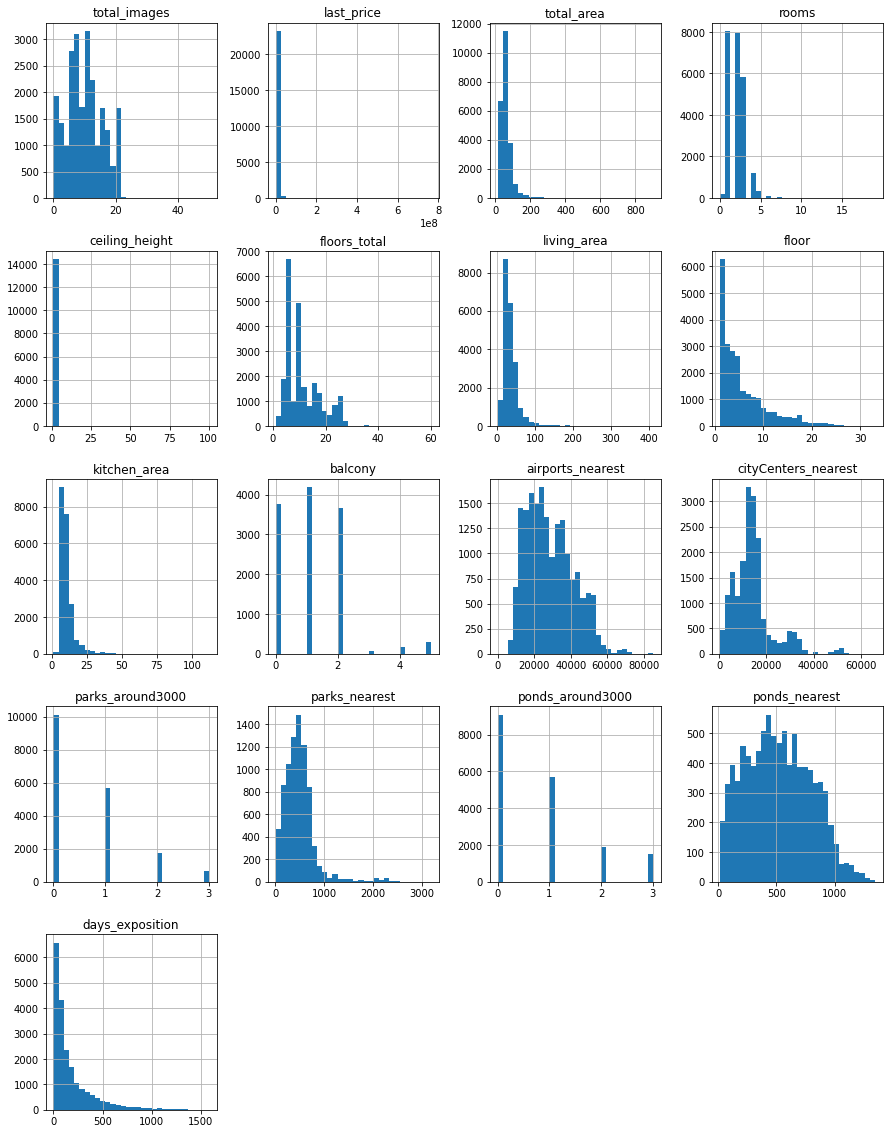

In [3]:
data.hist(figsize=(15, 20), bins=30)

### Предобработка данных

In [4]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['balcony'] = data['balcony'].fillna(0)

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [9]:
living_area = data['living_area'].median()/data['total_area'].median()*data['total_area']
data['living_area'] = data['living_area'].fillna(living_area)

In [10]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**Возможные варианты пропусков значений:**
- Высота потолков не указана т.к. потолки в среднем 2.65 и особого смысла указывать их нет, если в твоей квартире потолки как у всех.
- Не указано кол-во этажей дома возможно потому что сдается первый этаж и какое количество этажей сверху не имеет значения.
- Значения по жилой площади не указано, потому что жилая большей частью совпадает со всей сдаваемой площадью.
- Пропущены значения в "апартаментах", это значение приближено к общему числу сдаваемых помещений, сдаются квартиры а не отдельные комнаты.
- Площаль кухни пропущена потому что ее нет, в тех же "аппартаментах" или в коммуналке где кухня общая.
- Пропущены 49 значений в названии населненного пункта, это грубая ошибка при создании объявления.
- Цифры пропусков по значениям: расстояние до аэропорта, до центра города, до парка, число водоемов примерно совпадают. Предположительно это пропуски из-за того что все сдаваемые площади не имеют поблизости данные объекты.
- Так же примерно совпадают по кол-ву пропуски по наличию парков и водоемов поблизости, возможно их нет.


In [11]:
data[['floors_total']] = data[['floors_total']].astype(int)
data[['balcony']] = data[['balcony']].astype(int)

**Заменил на целочисленные значиния столбцы "этажи" и "балконы", не может быть 1.5 балкона или 0.5 этажа.**

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Видим что у нас проблемы с названиями населенных пунктов. Для начала переведем все значения в нижний реестр:**

In [13]:
data['locality_name'] = data['locality_name'].str.lower()

**Устраним неявные дубликаты**

In [14]:
right_name = 'поселок'
name = ['посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'городской поселок']
data['locality_name'] = data['locality_name'].replace(name, right_name, regex=True)

In [64]:
data.duplicated().sum()

0

**Удаляем выбивающееся значения**
- Удалю квартиры в которых более 6 балконов, это аномалия.

In [15]:
data.query('balcony <= 6')
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

**Исправляю возможные ошибки: вместо 2.5 указали 25.**

In [16]:
data['ceiling_height'].where(data['ceiling_height'] > 25, ((data['ceiling_height'] > 25)/10))
print(data['ceiling_height'])

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64


**Посмотрим как изменился датасет после обработки:**

In [17]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,NaN,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.600000,1,NaN,...,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300000,4,NaN,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,91.730769,9,NaN,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,NaN,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

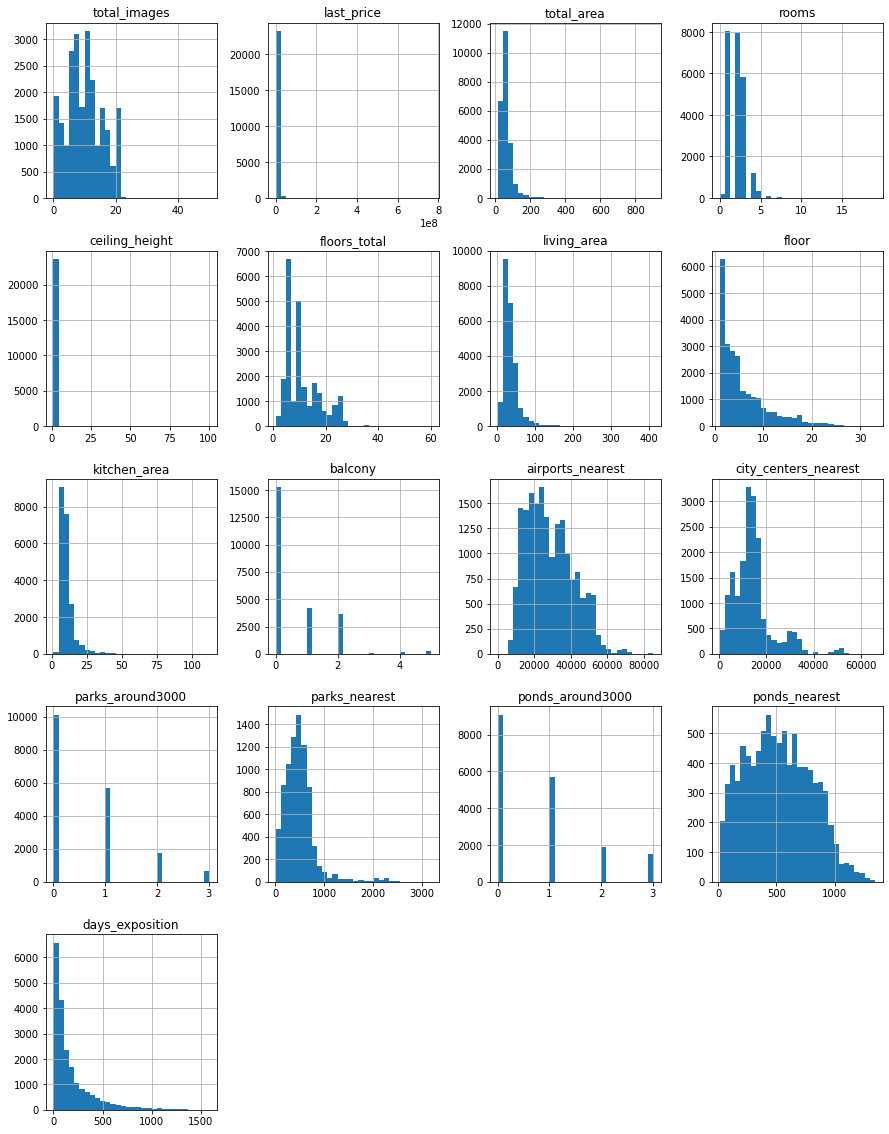

In [19]:
data.hist(figsize=(15, 20), bins=30)

### Посчитайте и добавьте в таблицу новые столбцы

**Стоимость одного кв м.**

In [21]:
data['price'] = data['last_price'] / data['total_area']

**День недели**

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.dayofweek
print(data['first_day_exposition'].head())
print(data['weekday'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]
0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64


**Месяц публикации**

In [23]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
print(data['month'].head())

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64


**Год публикации**

In [24]:
data['year'] = data['first_day_exposition'].dt.year
print(data['year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64


**Тип этажа квартиры**

In [25]:
def categorize_floor(row):
    if row["floor"] == 1:
        return 'первый'
    if row["floor"] == row["floors_total"]:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(categorize_floor, axis=1)
print(data['type_floor'].unique())

['другой' 'первый' 'последний']


**Расстояние до центра в км**

In [26]:
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)
print(data['city_centers_nearest'].unique())

[16. 19. 14.  7.  8. nan 12. 15. 52. 33. 31. 11. 13. 10.  2. 32.  4. 17.
 30.  5. 51. 50. 24. 18.  9. 28.  3.  6. 27. 21. 49. 35. 36. 34.  1. 29.
 26. 53. 22. 55. 20. 23. 25.  0. 66. 47. 40. 57. 37. 41. 43. 48. 62. 60.
 39. 42. 65. 54. 59. 45. 61. 63.]


**Расстояние до ближайшего аэропорта в км**

In [27]:
data['airports_nearest'] = round(data['airports_nearest'] / 1000)
print(data['airports_nearest'].unique())

[19. 13. 22. 28. 32. nan 53. 24. 51. 38. 48. 21. 34. 44. 39. 36. 15. 20.
 35. 12. 29. 30. 33. 11. 27. 14. 50. 45. 17. 23. 26. 68. 54. 16. 10. 52.
 49. 42. 43. 69. 18. 31. 58. 25. 61. 37. 40. 46. 55. 47.  8.  9. 41. 72.
 56. 57. 74. 85. 65. 70.  7. 76. 62. 59. 67. 81.  6. 79. 84. 73. 66. 64.
 82.  0. 60.]


**Расстояник до ближайшего парка в км**

In [28]:
data['parks_nearest'] = round(data['parks_nearest'] / 1000)
print(data['parks_nearest'].unique())

[ 0. nan  1.  2.  3.]


### Проведите исследовательский анализ данных

**Общая площадь**

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

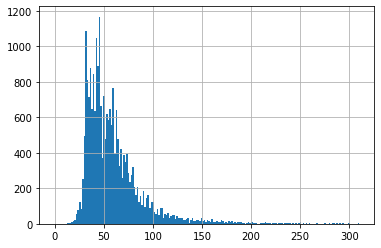

In [29]:
data['total_area'].hist(bins=200, range=(0,310))
data['total_area'].describe()

- Из гистограммы выше видно, что подавляющее большенство квартир площадью от 30 до 75кв.м
- Минимальная площадь: 12 кв.м.
- Максимальная 900кв.м. что не явлется нормальным
- Значения более 200кв.м. редки, поэтому можно отсеять эти данные.
- Средняя площадь квартир 52кв.м., хотя медиана равна 60.

count    23472.000000
mean        58.179801
std         26.531909
min         12.000000
25%         40.000000
50%         51.900000
75%         68.925000
max        200.000000
Name: total_area, dtype: float64

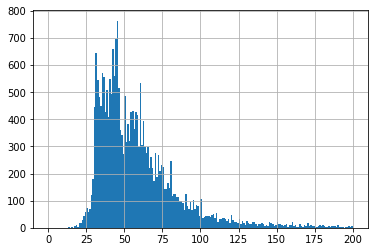

In [30]:
data = data.query('total_area <= 200')
data['total_area'].hist(bins=200, range=(0,200))
data['total_area'].describe()

**Жилая площадь**

count    23472.000000
mean        33.333296
std         17.304729
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

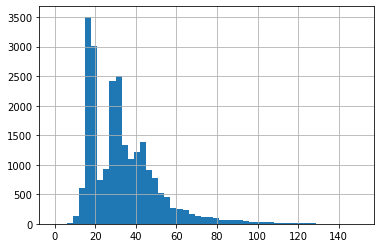

In [31]:
data['living_area'].hist(bins=50, range=(0,150))
data['living_area'].describe()

- Видим на гистограмме жилой площади что в среднем жилая площадь квартиры 30кв.м., она же почти равна медиане - 33
- Минимальная площадь 2кв.м., что вызывает вопрос "как жить в такой квартире?"
- Максимальная жилая площадь 164кв.м. что довольно внушительно.
- Значений по жилой площади меньше значений по общей площади, т.к. не все знают жилую площадь.

**Площадь кухни**

count    21223.000000
mean        10.386712
std          5.371820
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

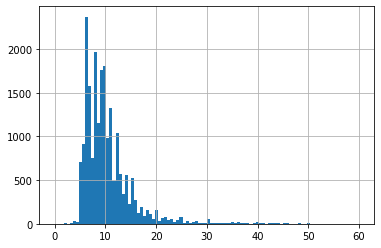

In [32]:
data['kitchen_area'].hist(bins=100, range=(0,60))
data['kitchen_area'].describe()

- Обращаем внимание что значения по столбцу "площади кухни" не совпадает со значениями общей площади, что значит некоторые квариты - студии.
- Среднее и медианное значение 9 и 10, что для характерно для средней площади квартиры в 52кв.м.
- Максимальное значение 93кв.м. - скорее всего это большая столовая двухъэтажной квартиры.

**Цена объекта**

count    2.347200e+04
mean     6.026304e+06
std      6.237847e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

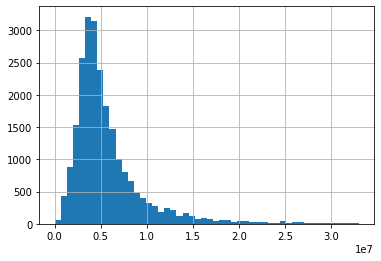

In [33]:
data['last_price'].hist(bins=50, range=(12190,33000000))
data['last_price'].describe()

- Минимальная цена 1.2кк, максимальная 33 миллиона.
- Средняя цена 4,6 млн, что соответвует средней общей площади 52кв.м.
- Значения свыше 25 млн редки, эта данные можно отбросить.

In [34]:
data = data.query('last_price <= 25000000')
data['last_price'].describe()

count    2.316700e+04
mean     5.564871e+06
std      3.582243e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.590000e+06
75%      6.527250e+06
max      2.500000e+07
Name: last_price, dtype: float64

**Количество комнат**

count    23167.000000
mean         2.016144
std          0.980954
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

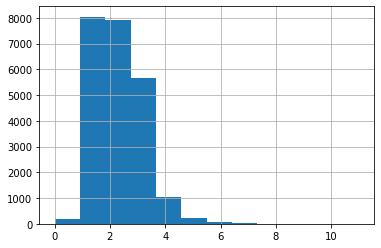

In [35]:
data['rooms'].hist(bins=12, range=(0,11))
data['rooms'].describe()

- Среднее и медианное количество комнат - 2. Делаем вывод что большенство квартир имеют минимум 2 комнаты.
- Совсем немного квартир не имеют ни одной комнаты, предположительно это студии.
- Заметим, что совсем немного квартир имеют 5 и более комнат.

count    23167.000000
mean         2.716677
std          0.995608
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

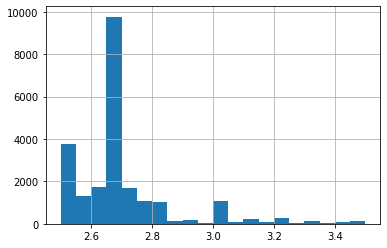

In [36]:
data['ceiling_height'].hist(bins=20, range=(3,3))
data['ceiling_height'].describe()

- Средняя высота потолка в сдаваемой площади 2,65 - вполне нормальная высота потолка.
- Медиана 2,71 - не далеко ушла от средней.
- Максимальная высота 100 метров, что не правдоподобно. Судя по гистограмме значений после 4м мало, поэтому отбросим эти данные.

In [37]:
data = data.query('ceiling_height <= 4')

count    23107.000000
mean         2.686151
std          0.194374
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

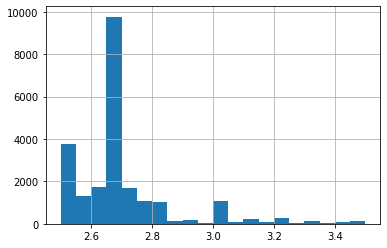

In [38]:
data['ceiling_height'].hist(bins=20, range=(3,3))
data['ceiling_height'].describe()

**Этаж квартиры**

count    23107.000000
mean         5.904877
std          4.903769
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

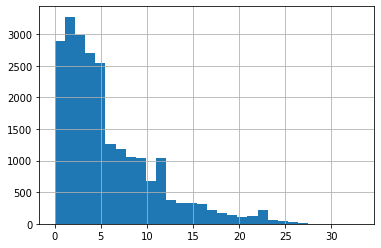

In [39]:
data['floor'].hist(bins=30, range=(0,33))
data['floor'].describe()

- Большество квартир располагается на 0-6 этаже. О чем так же говорит медиана 5,9.
- Немного квартир расположились на 6-16 этаже, скорее всего это уже новостройки.
- Максимальный этаж 33. Если сломается лифт придется долго идти.
- Гистограмма имеет хвост из небольших значений от 16 до 33 этажей, что вполне похоже на реальность. Рубить мы его не будем.

**Тип этажа квартиры**

<AxesSubplot:>

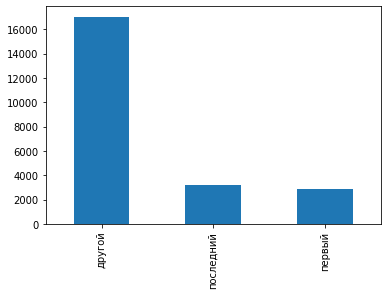

In [40]:
data['type_floor'].value_counts().plot(kind='bar')

- Около 2500 квартир расположенны на первом этаже, которые можно использовать как торговую площадь.
- Поледний этаж имею около 3000 квартир.
- Другой тип квартир имеют более 16 тысяч объектов.

**Расстояние до центра**

count    17616.000000
mean        14.425806
std          8.582779
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

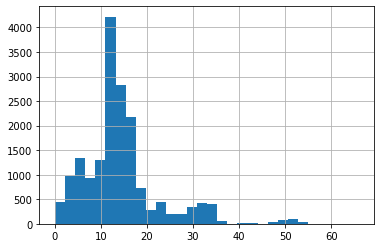

In [41]:
data['city_centers_nearest'].hist(bins=30, range=(0,66))
data['city_centers_nearest'].describe()

- В среднем 50% жилишь сдается в радиусе 13км от центра, что довольно близко. На гистограмме это пик со значением более 4 тыс. квартир.
- Максимальное расстояние 66км, говорит о том что окраины города в этом радиусе. В этом месте практически ничего не сдают.
- В самом центре сдается около 500 квартир.

**Расстояние до ближайшего аэропорта**

count    17598.000000
mean        28.863166
std         12.762131
min          0.000000
25%         18.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest, dtype: float64

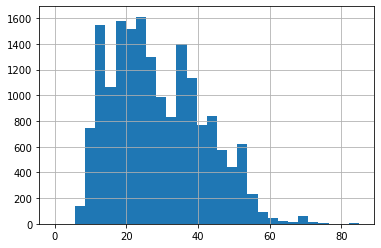

In [42]:
data['airports_nearest'].hist(bins=30, range=(0,85))
data['airports_nearest'].describe()

- Совсем рядом с аэропортом сдается около 170 жилых площадей. Застройка там не плотная.
- Пик приходится на расстояние 27км, что говорит о том что скорее всего в этом место стоят многоэтажки.
- Максимальное расстояние 85км, кол-во таких площадей стремиться к 0. Аэропорты строятся обычно в дали от жилых домов, поэтому предположу что 85км это расстояние от одного конца города до другого.

**Расстояние до ближайшего парка**

count    7684.000000
mean        0.445992
std         0.546734
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: parks_nearest, dtype: float64

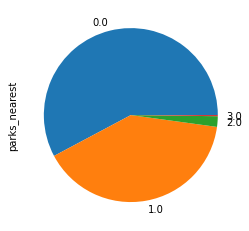

In [43]:
data['parks_nearest'].value_counts().plot(kind='pie')
data['parks_nearest'].describe()

- Заметим, что любая сдаваемая площадь имеет парк в доступности 3км максимум.
- Большенство квартир, судя по гистограмме, имеют парк во дворе. Это более 4 тыс. квартир.
- Около 3 тыс. жильцам приходится идти до парка в среднем 10-15 минут, что равно одному км.
- Незначительное кол-во квартир имеют парк в радиусе 2км.

**День и месяц публикации**

count        23107
unique           7
top       Thursday
freq          4169
Name: day_of_week, dtype: object

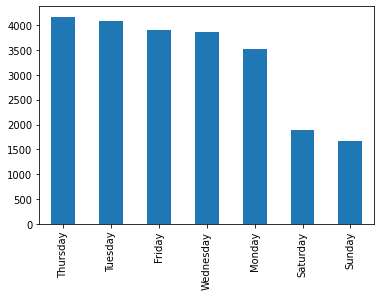

In [44]:
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data['day_of_week'].value_counts().plot(kind='bar')
data['day_of_week'].describe()

- Из гистограммы видим что практически все объявления выставляются в период с понедельника по пятницу.
- Около 2 тысяч объявлений создается в субботу и 1700 в воскресенье.
- Абсолютный топ занимает - Четверг.

<AxesSubplot:>

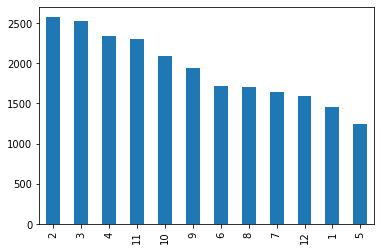

In [45]:
data['first_day_exposition'].dt.month.value_counts().plot(kind='bar')

- Первое что видим - февраль лидер по объявлениям.
- В марте и апреле объявлений не намного меньше чем в феврале.
- Из гистограммы заметим, что с сентября по октябрь, то есть осенью, идет рост.
- Все лето стабильно выставляется около 1700 объявлений. 
- В декабре и январе идет спад относительно других месяцев.
- Антилидер в этом рейтинге является Май, всего 1250 объявлений.

**Время продажи квартир**

count    20077.000000
mean       178.400857
std        216.987235
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

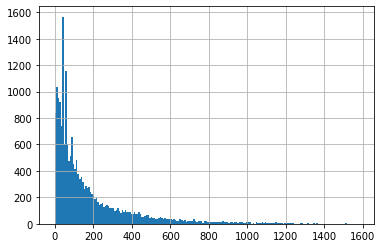

In [46]:
data.query('days_exposition != 0')['days_exposition'].hist(bins=200, range=(0,1580))
data['days_exposition'].describe()

- Следует заметить что на гистограмме видно выбросы в районе 50 и 100 дней. Рассмотрим данные более детально. Для этого построим следующую гистограмму.

<AxesSubplot:>

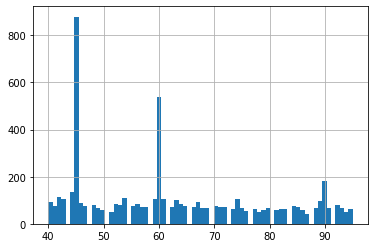

In [47]:
data.query('days_exposition != 0')['days_exposition'].hist(bins=70, range=(40,95))

- Выбросы на 45, 60 и 90й день. Они не с проста.
- Изучив условия размещения объявления на сайте Яндекс.Недвижимость приходим к выводу что коммерческие объекты выставляют заново через 60 дней, комнаты на 45й день и дом/гараж/участок на 90й день. 
- Избавимся от выбросов, т.к. они не являются фактической продажей, отсеяв сразу "нулевые" продажи.
- Значения после 1200 дней редки, поэтому так же избавимся от них.

In [48]:
data.query('45<days_exposition<46')['days_exposition'].unique()

array([45.])

In [49]:
sorted(data['days_exposition'].unique())

[nan,
 1.0,
 2.0,
 3.0000000000000004,
 4.0,
 5.0,
 6.000000000000001,
 7.0,
 8.0,
 9.0,
 10.0,
 11.000000000000002,
 12.000000000000002,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.000000000000004,
 23.000000000000004,
 24.000000000000004,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.00000000000001,
 45.00000000000001,
 46.00000000000001,
 47.00000000000001,
 48.00000000000001,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.00000000000001,
 88.00000000000001,
 89.00000000000001,
 90.00000000000001,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0

In [50]:
data = data.query('days_exposition != 45.00000000000001 and days_exposition != 60 and days_exposition != 94')

count    18613.000000
mean       188.334336
std        222.317380
min          1.000000
25%         42.000000
50%        107.000000
75%        246.000000
max       1580.000000
Name: days_exposition, dtype: float64

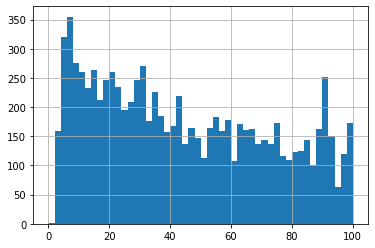

In [51]:
data['days_exposition'].hist(bins=50, range=(0,100))
data['days_exposition'].describe()

*Избавивишись от выбросов взгялинем на данные снова:*

count    18613.000000
mean       188.334336
std        222.317380
min          1.000000
25%         42.000000
50%        107.000000
75%        246.000000
max       1580.000000
Name: days_exposition, dtype: float64

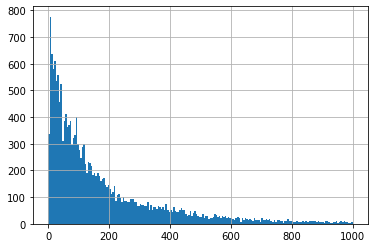

In [52]:
data['days_exposition'].hist(bins=200, range=(0,1000))
data['days_exposition'].describe()

- Максимально длительный период составил 1580 дней, продавали что-то совсем никому не нужное.
- В среднем скорость продажы - 188 дней, что так же хорошо заметно а гистограмме.
- В 25% случаев продажа ограничена 42 днями, что доволно быстро для недвижимости.
- Так же в 25% продажы затягиваются до 246 дней, что все так же не очень долго.

#### Факторы, больше всего влияющие на общую стоимость квартиры.

**Общая площадь**

Корреляция равна: 0.785571402860001


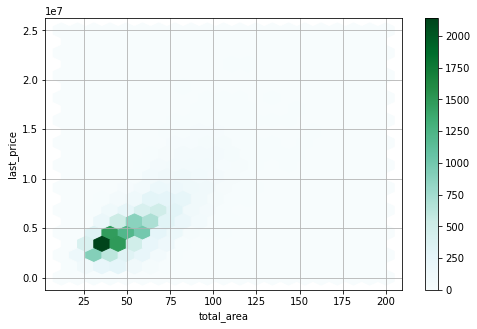

In [53]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8,5), sharex=False, grid=True)
print('Корреляция равна:', data['total_area'].corr(data['last_price']))

*Взаимосвязь общей площади и стоимости очень устойчива. А так же положительна, что говорит о том что стоимость напрямую зависит от общей площади*

**Жилая площадь**

Корреляция равна: 0.677995220623121


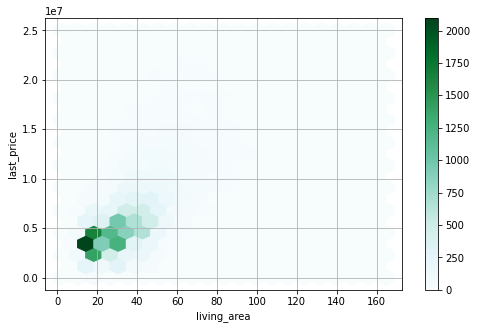

In [54]:
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8,5), sharex=False, grid=True)
print('Корреляция равна:', data['living_area'].corr(data['last_price']))

*Из графика видно как растет цена и количество жилых квадратных метров.*

**Площадь кухни**

Корреляция равна: 0.597600790226826


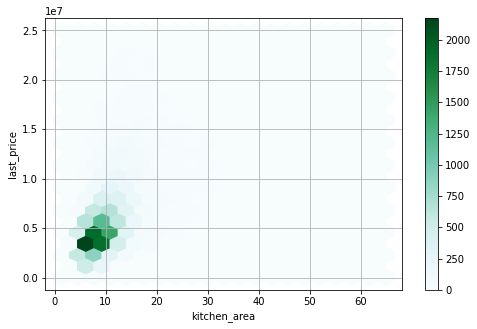

In [55]:
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8,5), sharex=False, grid=True)
print('Корреляция равна:', data['kitchen_area'].corr(data['last_price']))

*Взаимосвязь устойчива, и определенно можно сказать что бОльшая площадь кухни влияет на стоимость.*

**Количество комнат**

Корреляция равна: 0.5035583236371513


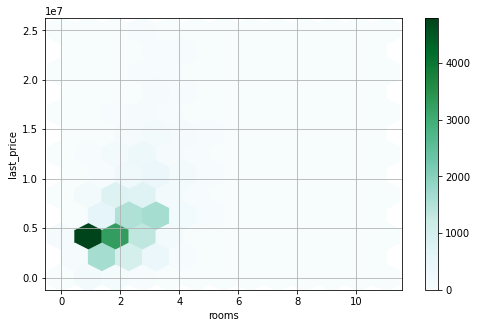

In [56]:
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=12, figsize=(8,5), sharex=False, grid=True)
print('Корреляция равна:', data['rooms'].corr(data['last_price']))

*Из графика видим зависимость количества комнат и стоимости объекта, что не мудрено, т.к. при увеличении комнат увеличивается и площадь, а каждый кв.м. увеличивает стоимость.*

**Тип этажа**

<AxesSubplot:xlabel='type_floor'>

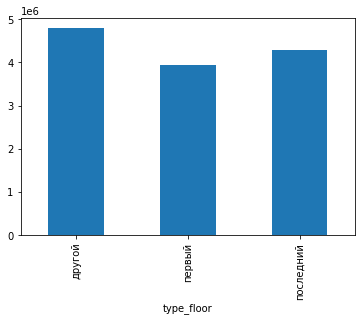

In [57]:
data.groupby('type_floor')['last_price'].median().plot.bar()

*Зависимость стоимости первого этажа и последнего незначительна, следует отметить что "другой" тип этажа преобладает в стоимости над остальными*

**Дата размещения**

<AxesSubplot:xlabel='first_day_exposition'>

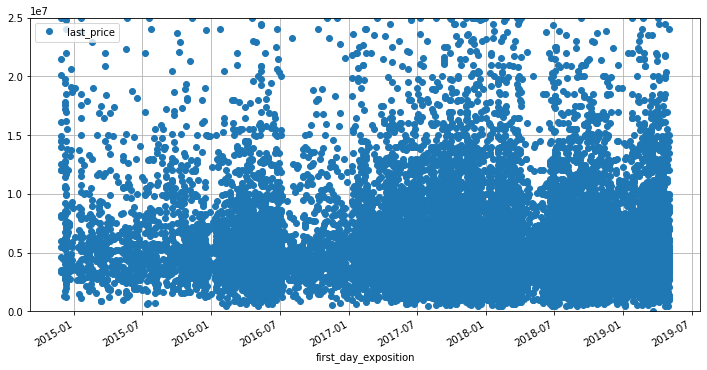

In [58]:
data.plot(x='first_day_exposition', y='last_price', style='o', ylim=(0,25000000), grid=True, figsize=(12,6))

*На графике отслеживается постепенное увеличение стоимости с растущей датой. Корреляция этих отношений определенно положительна и растет со временем, как и растет стоимость недвижимости в реалии. Вкладывать деньги в недвижимость никогда не будет ошибкой.*

**День размещения**

<AxesSubplot:xlabel='weekday'>

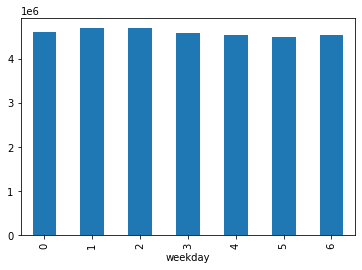

In [59]:
data.groupby('weekday')['last_price'].median().plot.bar()

*От дня размещения объявления общая стоимость практически никак не зависит*

**Месяц размещения**

<AxesSubplot:xlabel='month'>

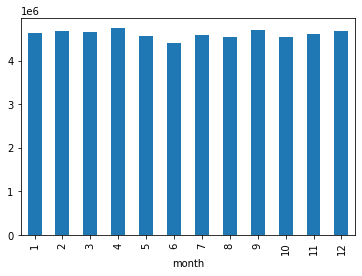

In [60]:
data.groupby('month')['last_price'].median().plot.bar()

- Стоимость в июне определенно ниже чем в остальные месяцы.
- Дороже всего недвижимость в сентябре.
- Больших различий в стоимости не наблюдается.

**Год размещения**

<AxesSubplot:xlabel='year'>

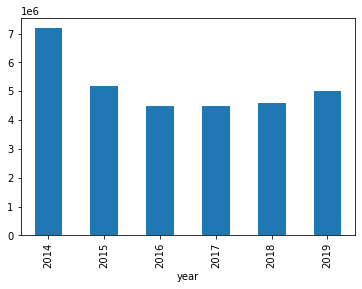

In [61]:
data.groupby('year')['last_price'].median().plot.bar()

- Дороже всего недвижимость была в 2014, постепенный спад наблюдается до 2016. Связано это с падаением рубля и укреплении доллара, наступил российский кризис.
- Жилье стало дорожать после 2017,в 2018 году. После снижения ставки по ипотеки начали активно скупать недвижимость.

#### Вывод: наибольшее влияние на стоимость недвижимости оказывает её площадь и временной интервал, так как со временем и инфляцией недвижимость дорожает.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [62]:
pivot = data.pivot_table(index='locality_name', values='price', aggfunc=['count', 'mean'])
pivot.columns=['Количество объявлений', 'Средняя цена за кв.м.']
pivot = pivot.sort_values(by='Количество объявлений', ascending=False)
pivot = pivot.head(10)
pivot.sort_values(by='Средняя цена за кв.м.', ascending=False)

,Количество объявлений,Средняя цена за кв.м.
locality_name,,
санкт-петербург,14421,110095.702655
пушкин,345,102398.102792
деревня кудрово,269,92163.835761
поселок парголово,289,90710.871205
поселок мурино,518,85491.531208
поселок шушары,406,78867.353503
колпино,304,75623.901091
всеволожск,367,68601.583430
гатчина,284,68539.564264


- Самый дорогой квадртаный метр несомненно в Санкт-Петербурге. Стоимость составляет 109775.
- Выборг умеет удивить самой низкой ценой из нашего топ 10 - 58093.
- Золотая середина: поселок Мурино 85656 за кв.м. и поселок Шушары 78677.

**Зависимость стоимости объектов от расстояния до центра города**

<AxesSubplot:>

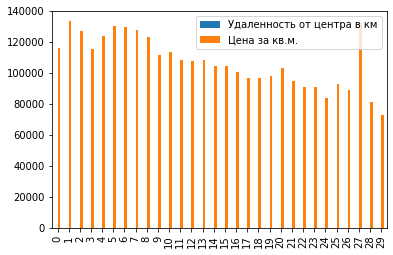

In [63]:
pivot_spb = data.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_nearest', values='price', aggfunc='mean').reset_index().sort_values(by='city_centers_nearest')
pivot_spb = pivot_spb.astype(int)
pivot_spb.columns = ['Удаленность от центра в км', 'Цена за кв.м.']
pivot_spb.plot(kind='bar')

- Все что в ределах 15км стоит не менее 100к за кв.м.
- В самом центре не самые дорогие квартиры.
- Наивысшая стоимость в пределах 1км от центра.
- Выбивается из общего ряда 27й километр, видимо там оцень развита инфраструктура.
- Дешевле всего объекты на 29м километре.

### Общий вывод

- Стоимость объектов меняется в зависимости от удаленности от центра, чем ближе к центру тем выше стоимость.
- Площадь помещений - второй важный фактор, который резко увеличивает стоимость любой квартиры.
- Интересная особенность - на 27м километре стоимость кв.м. дороже цены за кв.м. в самом центре культурной столицы.
- Из топ-10 по выложенным объявлениям самая высокая стоимость недвижимости в СПБ а самая дешевая в Выборге.
- Со временем любое жилье неуклонно растет в цене.
- Первые этажи самые дешевые, чуть дороже последние этажи. Этажи между первым и последним самые дорогие.
- Сервис Яндекс.Недвижимость в среднем "продает" квартиры за 90 дней.
- Чаще всего выкладывают объявления в феврале, а реже всего в мае.
- Большенство объявлений сделаны в период с понедельника по пятницу.
- В среднем площадь сдаваемых квартир 30-75кв.м.
- Минимальная цена недвижимости 1.2млн, максимальная 33 миллиона.